In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
df = pd.read_csv('data/cleaned_student_lifestyle_dataset.csv')

In [3]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


let's use multiple linear regression to understand how Study hours, Sleep hours, Social hours, Extracurricular hours and Physical activity hours which ones affect academic success more and in which way?

1. Build the model

In [4]:
df.columns

Index(['student_id', 'study_hours_per_day', 'extracurricular_hours_per_day',
       'sleep_hours_per_day', 'social_hours_per_day',
       'physical_activity_hours_per_day', 'gpa', 'stress_level',
       'stress_level_numeric', 'gpa_group'],
      dtype='object')

In [5]:
X = df[['study_hours_per_day', 'extracurricular_hours_per_day',
       'sleep_hours_per_day', 'social_hours_per_day',
       'physical_activity_hours_per_day']]
y = df['gpa']
X = sm.add_constant(X)

Fit the model

In [6]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:36   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0232      0.000    154.922      0.000       0.023       0.024
study_hours_per_day                 0.2371      0.002     96.302      0.000       0.232       0.242
extracurricular_hours_per_day       0.0752      0.004     19.510      0.000       0.068       0.083
sleep_hours_per_day                 0.0781      0.002     32.396      0.000       0.073       0.083
social_hours_per_day                0.0840      0.003     33.187      0.000       0.079       0.089
physical_activity_hours_per_day     0.0827      0.002     52.546      0.000       0.080       0.086
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.850
Skew:                           0.028   Prob(JB):                        0.654
Kurtosis:                       3.084   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

let's check for multicollinearity

In [7]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,0.0
1,study_hours_per_day,inf
2,extracurricular_hours_per_day,inf
3,sleep_hours_per_day,inf
4,social_hours_per_day,inf
5,physical_activity_hours_per_day,inf


we see that the VIF for all variables are greater than 5, which means that there is multicollinearity in the data. Let's check the correlation matrix to see which variables are correlated with each other.

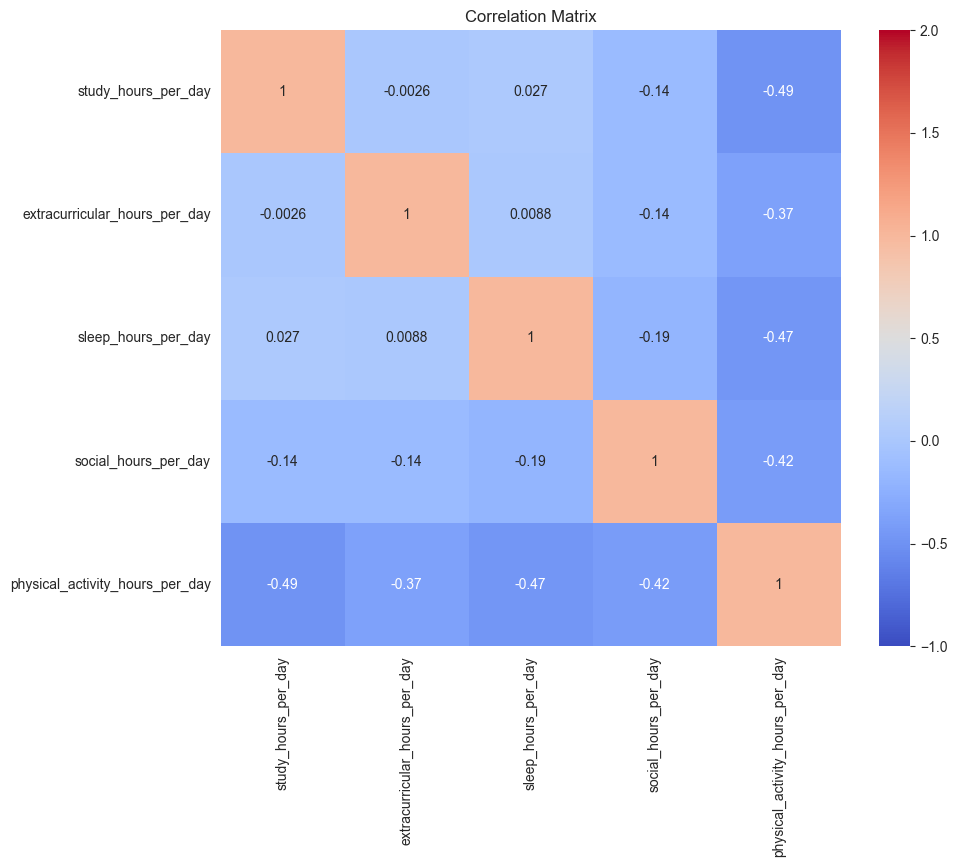

In [8]:
correlation_matrix = df[['study_hours_per_day', 'extracurricular_hours_per_day',
                         'sleep_hours_per_day', 'social_hours_per_day',
                         'physical_activity_hours_per_day']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=2)
plt.title('Correlation Matrix')
plt.show()

it seems that physical activity and other variables are correlated with each other. Let's transform our data and check it again and check the model again.

 Center the variables (subtract mean)

In [9]:
X_centered = X.copy()
for col in X.columns[1:]:  # Skip the constant
    X_centered[col] = X[col] - X[col].mean()

Try the model with centered variables

In [10]:
model_centered = sm.OLS(y, X_centered).fit()
model_centered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     493.3
Date:                Wed, 21 May 2025   Prob (F-statistic):          6.34e-296
Time:                        16:24:37   Log-Likelihood:                 267.08
No. Observations:                2000   AIC:                            -524.2
Df Residuals:                    1995   BIC:                            -496.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.1160      0.005    657.349      0.000       3.107       3.125
study_hours_per_day              1.736e+11   6.24e+11      0.278      0.781   -1.05e+12     1.4e+12
extracurricular_hours_per_day    1.736e+11   6.24e+11      0.278      0.781   -1.05e+12     1.4e+12
sleep_hours_per_day              1.736e+11   6.24e+11      0.278      0.781   -1.05e+12     1.4e+12
social_hours_per_day             1.736e+11   6.24e+11      0.278      0.781   -1.05e+12     1.4e+12
physical_activity_hours_per_day  1.736e+11   6.24e+11      0.278      0.781   -1.05e+12     1.4e+12
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.005
Skew:                          -0.003   Prob(JB):                        0.998
Kurtosis:                       2.995   Cond. No.                     8.30e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
vif_data_centered = pd.DataFrame()
vif_data_centered["Variable"] = X_centered.columns
vif_data_centered["VIF"] = [variance_inflation_factor(X_centered.values, i) for i in range(X_centered.shape[1])]
vif_data_centered

/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,1.065571
1,study_hours_per_day,inf
2,extracurricular_hours_per_day,inf
3,sleep_hours_per_day,inf
4,social_hours_per_day,inf
5,physical_activity_hours_per_day,inf


it doesn't seem to work. Let's try to remove physical activity with highest correlation with others factors.

In [12]:
X_without_physical = df[['study_hours_per_day', 'extracurricular_hours_per_day',
       'sleep_hours_per_day', 'social_hours_per_day']]
X_without_physical = sm.add_constant(X_without_physical)

In [13]:
model_without_physical = sm.OLS(y, X_without_physical).fit()
model_without_physical.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        16:24:37   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.0073      0.038     53.082      0.000       1.933       2.081
study_hours_per_day               0.1544      0.003     48.046      0.000       0.148       0.161
extracurricular_hours_per_day    -0.0075      0.004     -1.893      0.058      -0.015       0.000
sleep_hours_per_day              -0.0045      0.003     -1.439      0.150      -0.011       0.002
social_hours_per_day              0.0013      0.003      0.471      0.638      -0.004       0.007
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.850
Skew:                           0.028   Prob(JB):                        0.654
Kurtosis:                       3.084   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
vif_without_physical = pd.DataFrame()
vif_without_physical["Variable"] = X_without_physical.columns
vif_without_physical["VIF"] = [variance_inflation_factor(X_without_physical.values, i) for i in range(X_without_physical.shape[1])]
vif_without_physical

,Variable,VIF
0,const,69.704010
1,study_hours_per_day,1.019866
2,extracurricular_hours_per_day,1.020582
3,sleep_hours_per_day,1.039282
4,social_hours_per_day,1.079970


since all VIF values are less than 5, we can say that there is no multicollinearity in the data.

Let's try to apply Ridge regression to see if it improves the model.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [16]:
X_ridge = df[['study_hours_per_day', 'extracurricular_hours_per_day',
             'sleep_hours_per_day', 'social_hours_per_day',
             'physical_activity_hours_per_day']]

Standardize features

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ridge)

Ridge regression with cross-validation

In [18]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge = Ridge()
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    score = cross_val_score(ridge, X_scaled, y, cv=5).mean()
    print(f"Alpha: {alpha}, CV Score: {score:.5f}")

Alpha: 0.01, CV Score: 0.53635
Alpha: 0.1, CV Score: 0.53635
Alpha: 1.0, CV Score: 0.53635
Alpha: 10.0, CV Score: 0.53637
Alpha: 100.0, CV Score: 0.53515


In [19]:
best_alpha = 10.0
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_scaled, y)

Ridge(alpha=10.0)

In [20]:
ridge_results = pd.DataFrame({
    'Variable': X_ridge.columns,
    'Ridge_Coefficient': ridge_model.coef_
})

In [21]:
ridge_results.sort_values('Ridge_Coefficient', ascending=False)

,Variable,Ridge_Coefficient
0,study_hours_per_day,0.190070
3,social_hours_per_day,-0.031793
1,extracurricular_hours_per_day,-0.031840
2,sleep_hours_per_day,-0.035929
4,physical_activity_hours_per_day,-0.050778


 Use Ridge predictions as transformed features

In [22]:
X_ridge_transformed = ridge_model.predict(X_scaled).reshape(-1, 1)
X_ridge_transformed = sm.add_constant(X_ridge_transformed)

In [23]:
ridge_vifs = pd.DataFrame(columns=['Variable', 'Original_VIF', 'Ridge_VIF'])

# Original X data with constant
X_with_const = sm.add_constant(X_ridge)

# For each feature
for i, feature in enumerate(X_ridge.columns):
    # Calculate original VIF
    original_vif = variance_inflation_factor(X_with_const.values, i+1)  # +1 to skip constant

    # Create a copy of the data for Ridge regression
    other_features = [col for col in X_ridge.columns if col != feature]
    X_others = X_ridge[other_features]
    y_feature = X_ridge[feature]

    # Apply standardization
    X_others_scaled = scaler.fit_transform(X_others)

    # Fit Ridge model to predict this feature from others
    feature_ridge = Ridge(alpha=best_alpha)
    feature_ridge.fit(X_others_scaled, y_feature)

    # Calculate Ridge R-squared
    y_pred = feature_ridge.predict(X_others_scaled)
    r_squared = 1 - np.sum((y_feature - y_pred)**2) / np.sum((y_feature - y_feature.mean())**2)

    # Calculate Ridge VIF
    ridge_vif = 1 / (1 - r_squared)

    # Add to dataframe
    ridge_vifs.loc[len(ridge_vifs)] = [feature, original_vif, ridge_vif]

# Sort by original VIF to show the change
ridge_vifs = ridge_vifs.sort_values('Original_VIF', ascending=False)
print(ridge_vifs)

                          Variable  Original_VIF     Ridge_VIF
0              study_hours_per_day           inf   1031.967974
1    extracurricular_hours_per_day           inf    429.317654
2              sleep_hours_per_day           inf   1163.141027
3             social_hours_per_day           inf   2412.861127
4  physical_activity_hours_per_day           inf  22986.322922


/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/master/PycharmProjects/DUNE_WIKI/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encoun

we see that the VIF are extremely high for all variables.

So, it seems that we need to apply the bootstrpap method to get the confidence intervals for the coefficients or Kruskall-Wallis test to check the significance of the variables.

Implementing bootstrapping to get confidence intervals for our regression coefficients


In [24]:
from tqdm import tqdm  # For progress bar

# Set random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstraps = 1000

# Store coefficients from each bootstrap sample
bootstrap_coefficients = []

# Original data
X_final = df[['study_hours_per_day', 'extracurricular_hours_per_day',
              'sleep_hours_per_day', 'social_hours_per_day']]
X_final = sm.add_constant(X_final)
y_final = df['gpa']

# Perform bootstrapping
for i in tqdm(range(n_bootstraps)):
    # Sample with replacement
    indices = np.random.choice(len(df), size=len(df), replace=True)
    X_sample = X_final.iloc[indices]
    y_sample = y_final.iloc[indices]
    
    # Fit regression model
    bootstrap_model = sm.OLS(y_sample, X_sample).fit()
    
    # Store coefficients
    bootstrap_coefficients.append(bootstrap_model.params)

# Convert to DataFrame
bootstrap_results = pd.DataFrame(bootstrap_coefficients)


100%|██████████| 1000/1000 [00:00<00:00, 1070.39it/s]


In [25]:
# Calculate confidence intervals (95%)
confidence_intervals = pd.DataFrame({
    'Variable': X_final.columns,
    'Mean': bootstrap_results.mean(),
    'Std': bootstrap_results.std(),
    '2.5%': bootstrap_results.quantile(0.025),
    '97.5%': bootstrap_results.quantile(0.975)
})

print("Bootstrap 95% Confidence Intervals:")
print(confidence_intervals)


Bootstrap 95% Confidence Intervals:
                                                    Variable      Mean  \
const                                                  const  2.006736   
study_hours_per_day                      study_hours_per_day  0.154365   
extracurricular_hours_per_day  extracurricular_hours_per_day -0.007628   
sleep_hours_per_day                      sleep_hours_per_day -0.004457   
social_hours_per_day                    social_hours_per_day  0.001295   

                                    Std      2.5%     97.5%  
const                          0.037070  1.936360  2.079030  
study_hours_per_day            0.003280  0.147974  0.160700  
extracurricular_hours_per_day  0.004146 -0.015335  0.000350  
sleep_hours_per_day            0.003014 -0.010189  0.001449  
social_hours_per_day           0.002917 -0.004417  0.006944  


In [26]:
# Calculate 90%, 95%, and 99% confidence intervals
confidence_intervals_multi = pd.DataFrame({
    'Variable': X_final.columns,
    'Mean': bootstrap_results.mean(),
    'Std': bootstrap_results.std(),
    '5%': bootstrap_results.quantile(0.05),    # 90% CI lower bound
    '95%': bootstrap_results.quantile(0.95),   # 90% CI upper bound
    '2.5%': bootstrap_results.quantile(0.025), # 95% CI lower bound
    '97.5%': bootstrap_results.quantile(0.975), # 95% CI upper bound
    '0.5%': bootstrap_results.quantile(0.005), # 99% CI lower bound
    '99.5%': bootstrap_results.quantile(0.995) # 99% CI upper bound
})

print("Bootstrap Confidence Intervals:")
print(confidence_intervals_multi)


Bootstrap Confidence Intervals:
                                                    Variable      Mean  \
const                                                  const  2.006736   
study_hours_per_day                      study_hours_per_day  0.154365   
extracurricular_hours_per_day  extracurricular_hours_per_day -0.007628   
sleep_hours_per_day                      sleep_hours_per_day -0.004457   
social_hours_per_day                    social_hours_per_day  0.001295   

                                    Std        5%       95%      2.5%  \
const                          0.037070  1.947246  2.069124  1.936360   
study_hours_per_day            0.003280  0.148752  0.159656  0.147974   
extracurricular_hours_per_day  0.004146 -0.014267 -0.000994 -0.015335   
sleep_hours_per_day            0.003014 -0.009513  0.000532 -0.010189   
social_hours_per_day           0.002917 -0.003453  0.006250 -0.004417   

                                  97.5%      0.5%     99.5%  
const                 

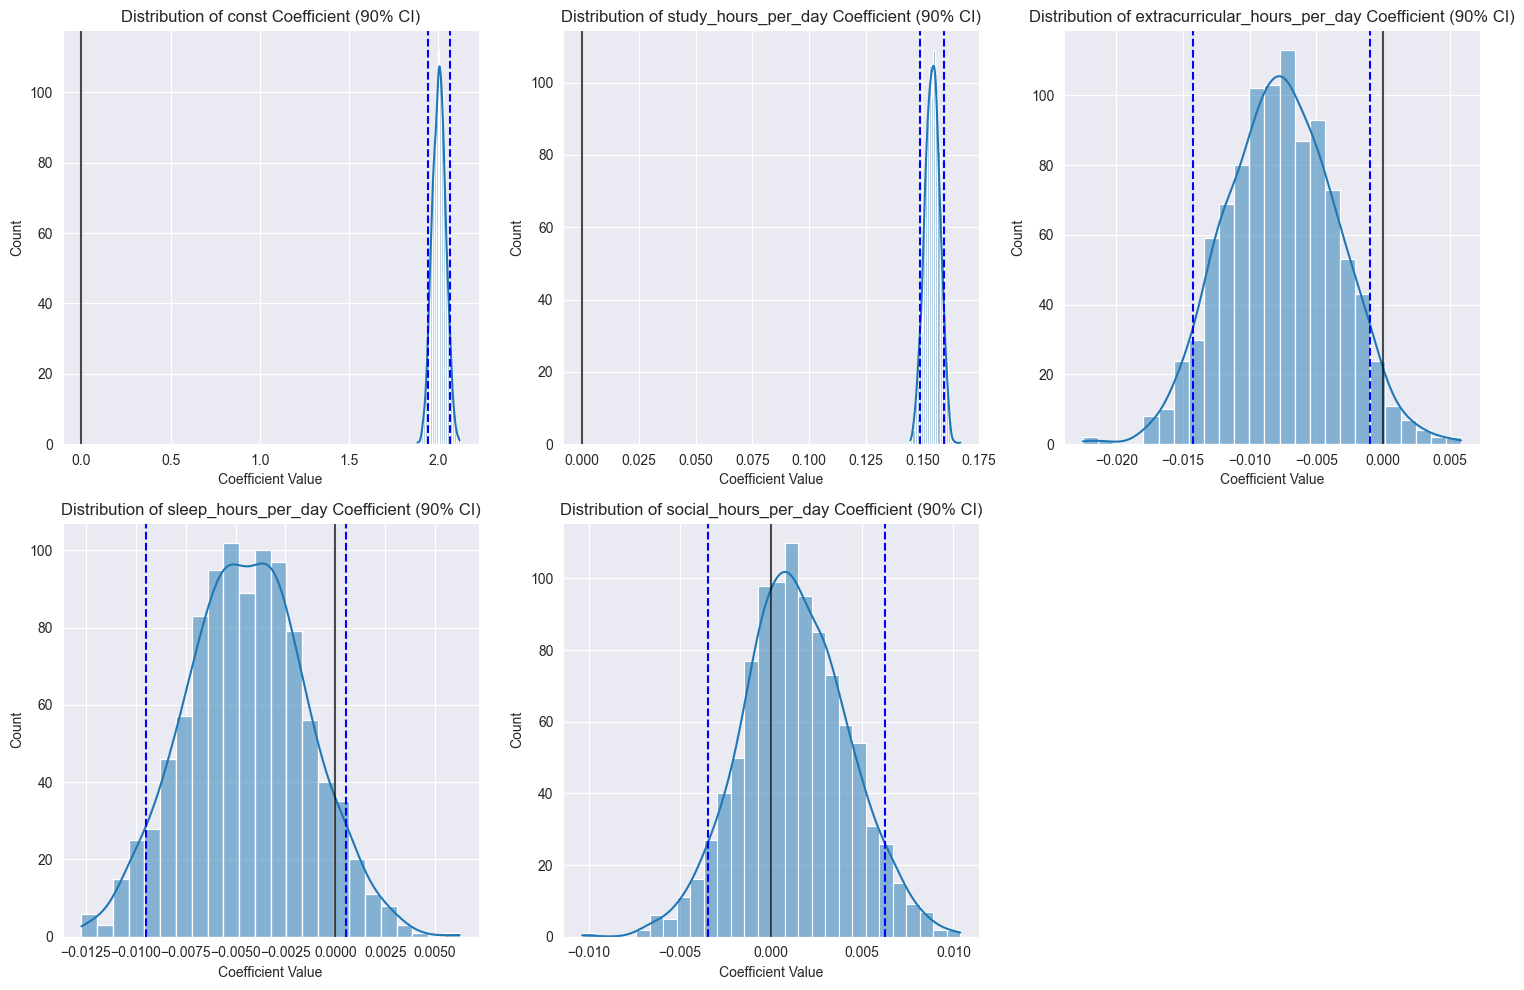

In [27]:
# Visualize the distribution of coefficients with 90% CI
plt.figure(figsize=(15, 10))
for i, col in enumerate(bootstrap_results.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(bootstrap_results[col], kde=True)
    plt.axvline(x=confidence_intervals_multi.loc[col, '5%'], color='blue', linestyle='--', label='90% CI')
    plt.axvline(x=confidence_intervals_multi.loc[col, '95%'], color='blue', linestyle='--')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)  # Add line at zero
    plt.title(f'Distribution of {col} Coefficient (90% CI)')
    plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()


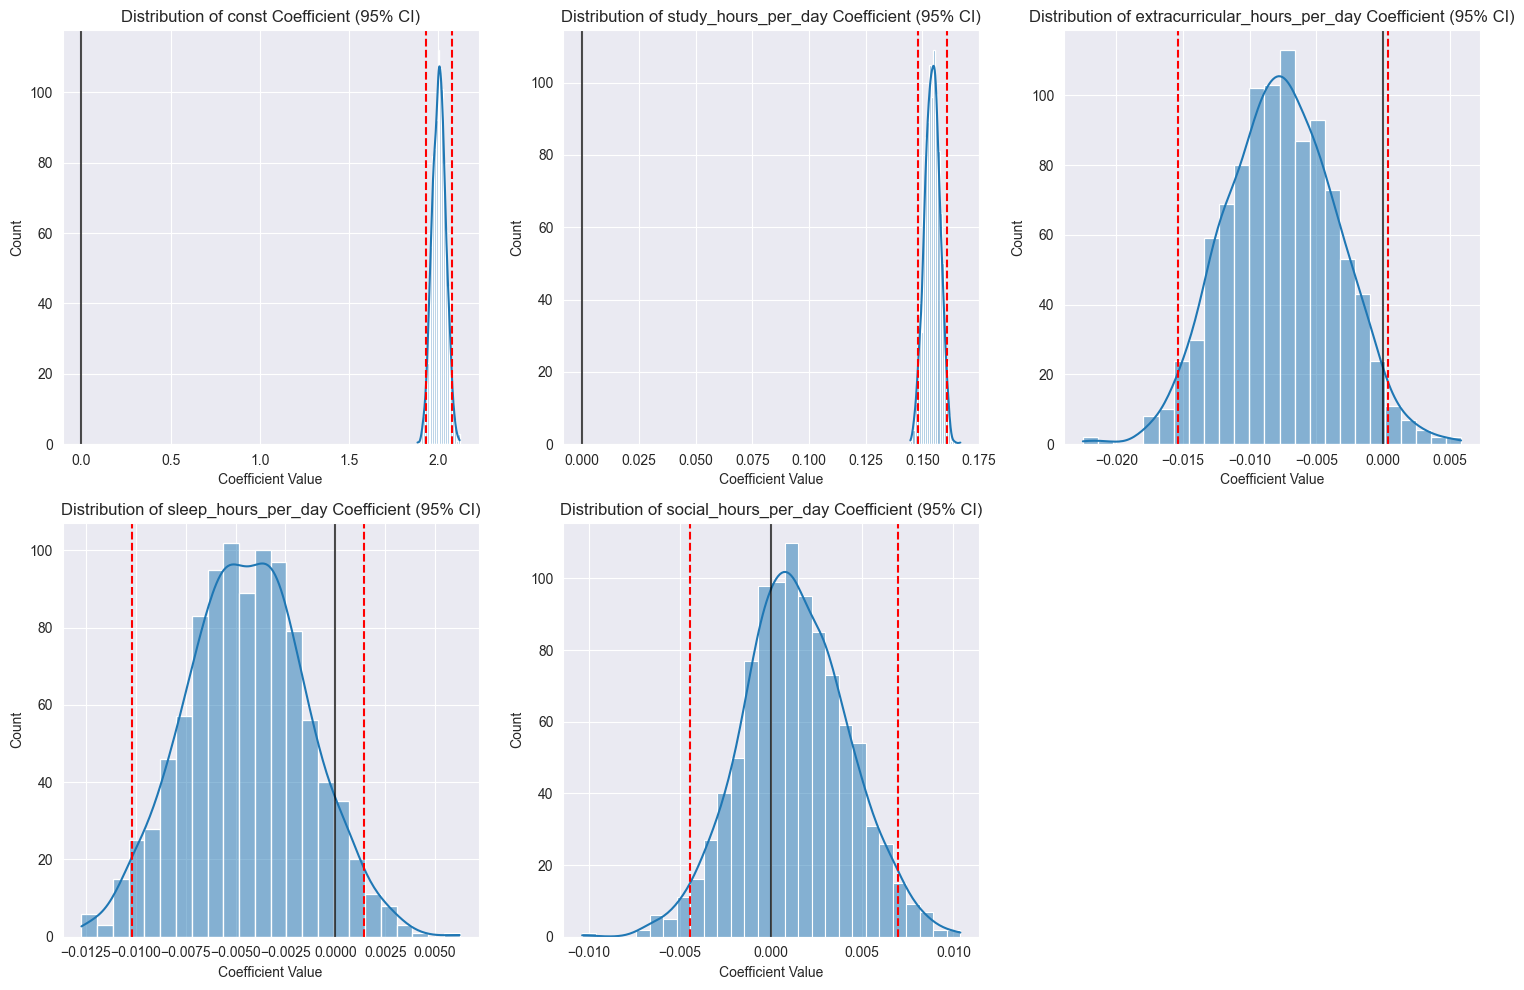

In [28]:
# Visualize the distribution of coefficients with 95% CI
plt.figure(figsize=(15, 10))
for i, col in enumerate(bootstrap_results.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(bootstrap_results[col], kde=True)
    plt.axvline(x=confidence_intervals_multi.loc[col, '2.5%'], color='red', linestyle='--', label='95% CI')
    plt.axvline(x=confidence_intervals_multi.loc[col, '97.5%'], color='red', linestyle='--')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)  # Add line at zero
    plt.title(f'Distribution of {col} Coefficient (95% CI)')
    plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Visualize the distribution of coefficients with 99% CI

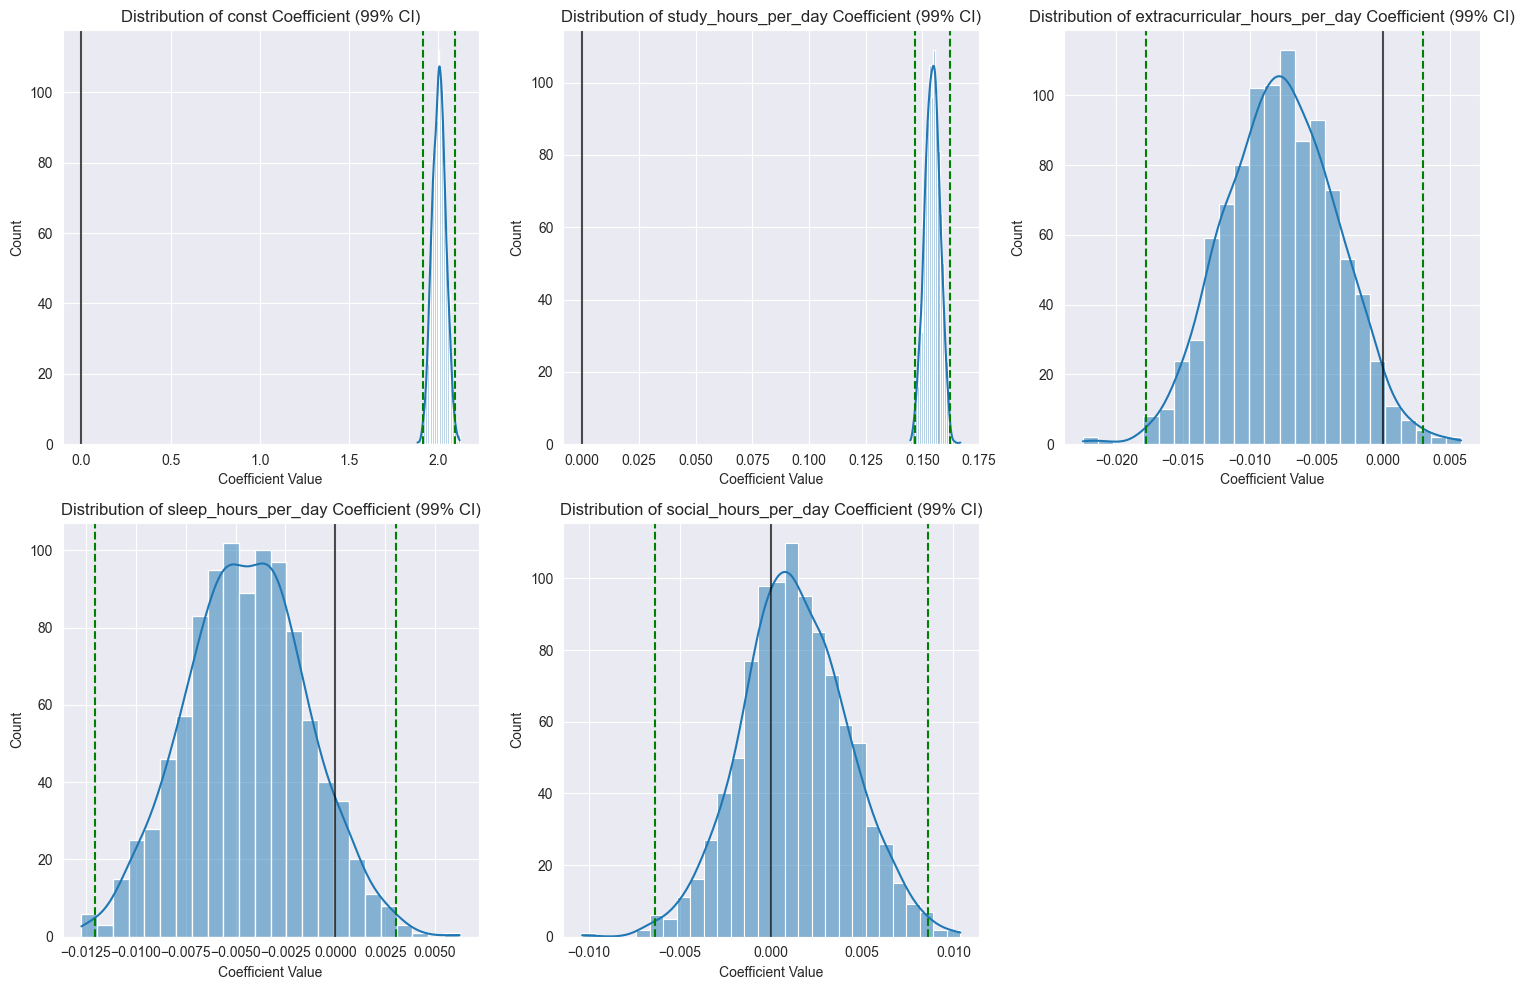

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(bootstrap_results.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(bootstrap_results[col], kde=True)
    plt.axvline(x=confidence_intervals_multi.loc[col, '0.5%'], color='green', linestyle='--', label='99% CI')
    plt.axvline(x=confidence_intervals_multi.loc[col, '99.5%'], color='green', linestyle='--')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)  # Add line at zero
    plt.title(f'Distribution of {col} Coefficient (99% CI)')
    plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()


Significance testing with bootstrapping:
A coefficient is considered statistically significant if its confidence interval does not include zero.

We can see that **extracurricular hours**, **sleep hours** and **social hours** have confidence intervals that do not include zero, indicating that they may not be statistically significant predictors of GPA. **Study hours** have confidence interval that doesn't include zero, suggesting that it is significant predictor.

let's check it with using code

In [30]:
significance_multi = pd.DataFrame({
    'Variable': X_final.columns
})
significance_multi.set_index('Variable', inplace=True)

create the function to check the significance

In [31]:
def check_confidence_intervals(X_columns, confidence_intervals_df, significance_df):
    """
    Check if 0 is contained within confidence intervals at 90%, 95%, and 99% levels
    and update the significance DataFrame accordingly.

    Parameters:
    -----------
    X_columns : list or Index
        The columns/variables to check
    confidence_intervals_df : DataFrame
        DataFrame containing confidence intervals
    significance_df : DataFrame
        DataFrame to update with significance flags

    Returns:
    --------
    DataFrame
        Updated significance DataFrame
    """
    confidence_levels = {
        90: ('5%', '95%', 'Contains_Zero_90%'),
        95: ('2.5%', '97.5%', 'Contains_Zero_95%'),
        99: ('0.5%', '99.5%', 'Contains_Zero_99%')
    }

    # Check each confidence level for all variables
    for level, (lower_col, upper_col, result_col) in confidence_levels.items():
        for var in X_columns:
            lower_bound = confidence_intervals_df.loc[var, lower_col]
            upper_bound = confidence_intervals_df.loc[var, upper_col]
            significance_df.loc[var, result_col] = (lower_bound <= 0 <= upper_bound)

    return significance_df

In [32]:
significance_multi = check_confidence_intervals(
    X_final.columns,
    confidence_intervals_multi,
    significance_multi
)

In [33]:
significance_multi

,Contains_Zero_90%,Contains_Zero_95%,Contains_Zero_99%
Variable,,,
const,False,False,False
study_hours_per_day,False,False,False
extracurricular_hours_per_day,False,True,True
sleep_hours_per_day,True,True,True
social_hours_per_day,True,True,True


According to the results, we can conclude that:
- **Study hours**: Significant predictor of GPA at all confidence levels.
- **Extracurricular hours**: Significant predictor at 90% confidence level, but not at 95% or 99%.
- **Sleep hours**: Not a significant predictor at any confidence level.
- **Social hours**: Not a significant predictor at any confidence level.
___
it matches with visualization interpretation of coefficients.

### Conclusion
In this analysis, we used multiple linear regression to understand the impact of various lifestyle factors on academic success (GPA). We found that study hours are a significant predictor of GPA, while extracurricular hours show some significance at lower confidence levels. Sleep and social hours do not appear to significantly affect GPA. So it means that students that want to increase their GPA must spend more time on studying. At the same time they can have enough time for socializing, sleeping and doing extracurricular activities, it will not affect their GPA.